# EMPLOYEE ATTRITION : HR ANALYTICS

 One of the crucial roles of the HR Dept is to minimize the employee attrition rate i.e. preventing the reduction of staff(voluntary resigning or laid off by the company). If the HR dept is unable to do so,

- The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners

- A sizeable department has to be maintained, for the purposes of recruiting new talent

- More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market.

The management of the company has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Playing the role of a Lead Data Analyst in the firm, this project has been assigned to me.
Join me as I tread on this journey of exploration and attempt to figure out the main causes behind the attrition rate of company XYZ.

## Preliminary Wrangling: 

We have been provided general data on the employees by the company of last 2 years which includes their personal details as well as their details regarding pertaiing to their workspace

We have also conducted 2 surveys of our own

- We took a Survey(Quantitave Assessment) of Employees asking them about the Work Environment, their Job Satisfaction and Work-life Balance

- We also a took a survey of Mangers asking them to the employees under them pertaining 





In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
#Importing the Employee Survey Data 
df1=pd.read_csv('employee_survey_data.csv')
print(df1.columns)
df1.head()


Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [3]:
#Importing the Employee General Data 
df2=pd.read_csv('general_data.csv')
print(df2.columns)
df2.head()

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
#Importing the Manager Survey Data
df3=pd.read_csv('manager_survey_data.csv')
print(df3.columns)
df3.head()

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating'], dtype='object')


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [5]:
df=df1.merge(df2,on='EmployeeID',how='inner')

In [6]:
#Creating a master dataset by merging all 3 datasets
df=df.merge(df3,on='EmployeeID',how='inner')
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3


In [17]:
#Finding out about the data types and null values present in the dataset across columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
EmployeeID                 4410 non-null int64
EnvironmentSatisfaction    4385 non-null float64
JobSatisfaction            4390 non-null float64
WorkLifeBalance            4372 non-null float64
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 

First and foremost lets try to understand the demographics of our company 

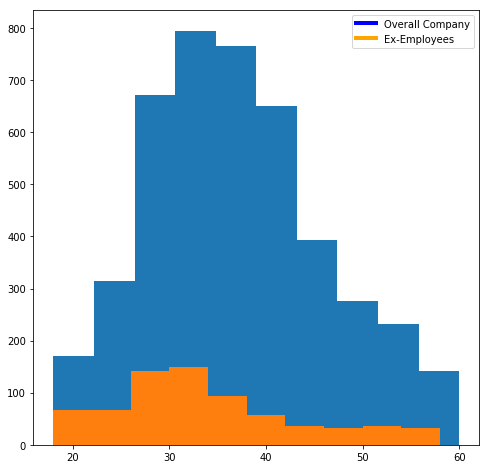

In [16]:
plt.figure(figsize=[8,8])
#Overall Company
plt.hist(x=df['Age'])
#Ex-Employees
plt.hist(x=df[df['Attrition']=='Yes']['Age']);
#Legend Elements
legend_elements = [Line2D([0], [0], color='b', lw=4, label='Overall Company'),
                   Line2D([0], [0], lw=4, color='orange', label='Ex-Employees')]
plt.legend(handles=legend_elements, loc='best')

To see if age has an effect on attrition I plotted to see the age distribution of the employees who left. If the age were not to have any effect on attrition then the distibution would be same as the global distribution but we can see there is a dip when we get to older age distribution

Next I thought of Looking at the Gender Distribution

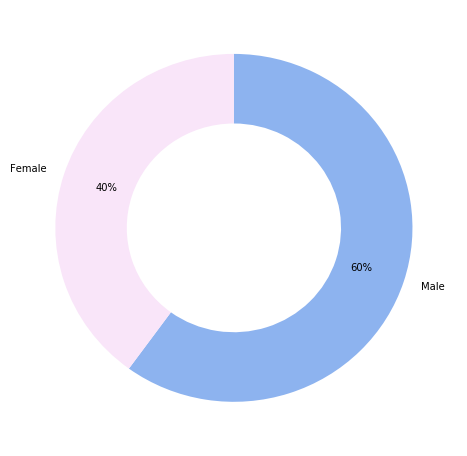

In [25]:
#Creating a pie plot to visualize the gender distribution
plt.figure(figsize=[8,8])
src=df.Gender.value_counts()
plt.pie(src,labels=src.index,startangle=90,counterclock=False,colors=['#8db3ef','#f9e5f9'],wedgeprops={'width':0.4},autopct='%1.0f%%', pctdistance=0.75);

In [26]:
df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [28]:
#Dropping Redundant Columns
df.drop(['Over18','EmployeeCount','StandardHours'],axis=1,inplace=True)

In [29]:
#Checking the available columns
df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

We know that the average number of employees at XYZ are approximately 4000. Using this, we can find out the attrition rate of the company.

In [32]:
#Calculating the attrition rate
atrate=len(df[df['Attrition']=='Yes'])/4000
atrate

0.17775

The attrition rate of the company XYZ (<b><i>17.78%</i></b>) is very high considering the ideal attrition rate is <b><i>10%</i></b> and it is also significantly higher than the global average of <b><i>11.2%</i></b>. 

In [46]:
#Creating a function to classify the employees into generation
def Gen(row):
    if row['Age']<=37:
        row['Gen']='Millenials'
        return 'Millenials'
    elif ((row['Age']>37)&(row['Age']<=54)):
        row['Gen']='Generation X'
        return 'Generation X'
    elif ((row['Age']>54)&(row['Age']<74)):
        row['Gen']='Boomers'
        return 'Boomers'
    else:
        row['Gen']='Silent'
        return 'Silent'
df['Gen']=''

In [47]:
#Applying the function
df['Gen']=df.apply(Gen,axis=1)

In [86]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gen
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,College,...,11,0,1.0,6,1,0,0,3,3,Generation X
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,Without College Degree,...,23,1,6.0,3,5,1,4,2,4,Millenials
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,Master,...,15,3,5.0,2,5,0,3,3,3,Millenials
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,Doctor,...,11,3,13.0,5,8,7,5,2,3,Generation X
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,Without College Degree,...,12,2,9.0,2,6,0,4,3,3,Millenials


We often read around the news that millenials are pciky about the job. So i thought of dividing the age into their respective generation. 
I decide to see how many companies have employees worked at in cases of exemployees and those who are still working there

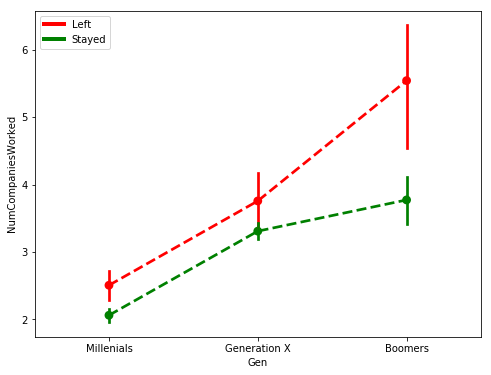

In [82]:
#Visualising the number of companies each genration has worked for with respect to their current status in the company
plt.figure(figsize=[8,6])
#Those Who Left
sns.pointplot(data=df[df['Attrition']=='Yes'],x='Gen',y='NumCompaniesWorked',order=['Millenials','Generation X','Boomers'],color='Red',linestyles=["--"]);
#Thos who stayed
sns.pointplot(data=df[df['Attrition']=='No'],x='Gen',y='NumCompaniesWorked',order=['Millenials','Generation X','Boomers'],color='Green',linestyles=["--"]);
#Creating the legend
legend_elements = [Line2D([0], [0], color='r', lw=4, label='Left'),
                   Line2D([0], [0], lw=4, color='g', label='Stayed')]
plt.legend(handles=legend_elements, loc='best')

In [84]:
#Creating the function the transform the education into their meaningful substitutes using the data dictionary
def Edu(row):
    if row['Education']==1:
        row['Education']='Without College Degree'
        return 'Without College Degree'
    elif (row['Education']==2):
        row['Education']='College'
        return 'College'
    elif (row['Education']==3):
        row['Education']='Bachelor'
        return 'Bachelor'
    elif (row['Education']==4):
        row['Education']='Master'
        return 'Master'
    else:
        row['Education']='Doctor'
        return 'Doctor'

In [85]:
#Applying the function
df['Education']=df.apply(Edu,axis=1)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

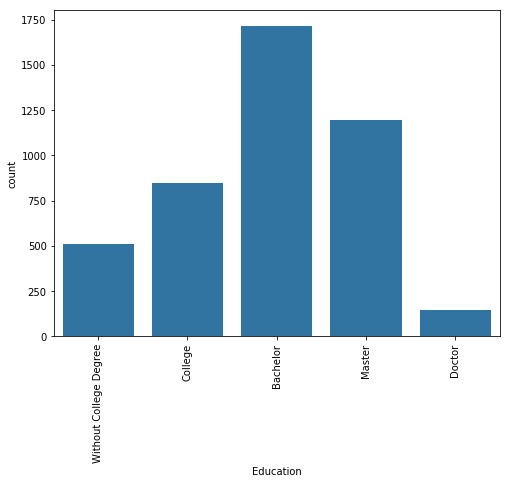

In [92]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['Education'],color=sns.color_palette()[0],order=['Without College Degree','College','Bachelor','Master','Doctor'])
plt.xticks(rotation=90)

In [109]:
#setting the education into their respective order
order=['Without College Degree','College','Bachelor','Master','Doctor']
order=pd.api.types.CategoricalDtype(ordered=True,categories=order)
df['Education']=df['Education'].astype(order)

Next I decided to look at how the employees are distributed according to their education levels and what percentage of them left the company

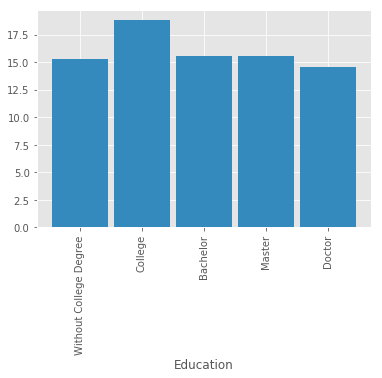

In [261]:
x=df.groupby(['Education']).Attrition.count()
y=df[df['Attrition']=='Yes'].groupby(['Education']).Age.count()
z=(y/x)*100
z.plot(kind='bar',color=[sns.color_palette()[1]],width=0.9)

We can see the there is a sudden increase of college but it gradually decreases as the level of education increases

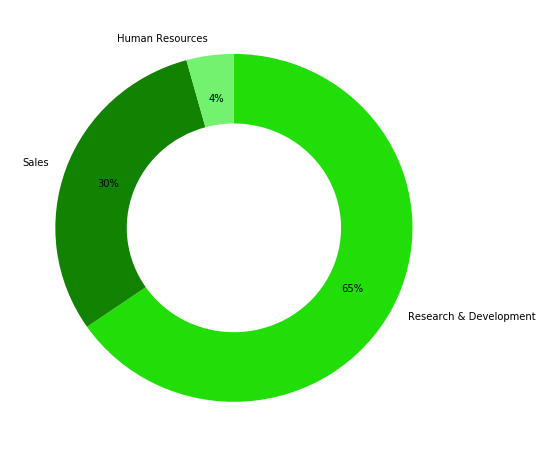

In [138]:
plt.figure(figsize=[8,8])
src=df.Department.value_counts()
plt.pie(src,labels=src.index,startangle=90,counterclock=False,colors=['#21dd08','#118202','#73f26f'],wedgeprops={'width':0.4},autopct='%1.0f%%', pctdistance=0.75);

We can see that a Research and Development constitutes a major par of the compay whereas the HR department is only about 4%

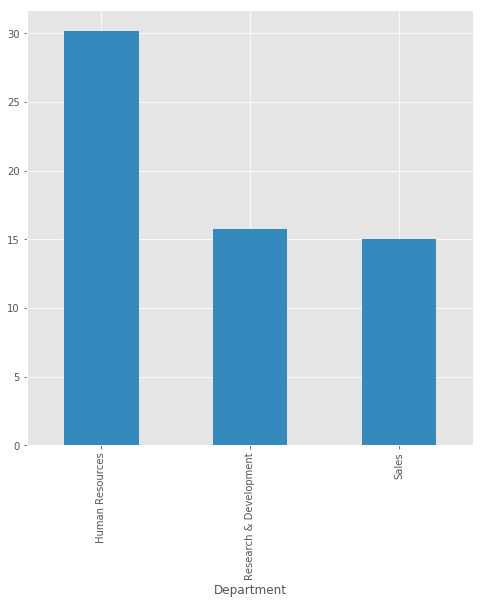

In [186]:
#Plotting the percentage of attrition across dept
plt.figure(figsize=[8,8])
x=df.groupby(['Department']).Attrition.count()
y=df[df['Attrition']=='Yes'].groupby(['Department']).Age.count()
z=(y/x)*100
z.plot(kind='bar',color=[sns.color_palette()[1]])


Even though the HR department is smallest part of the company, nearly 30% of it's department has left in the previous year. This is ironic given that the HR department itself is responsible for maintaining and assessing the attrition rate

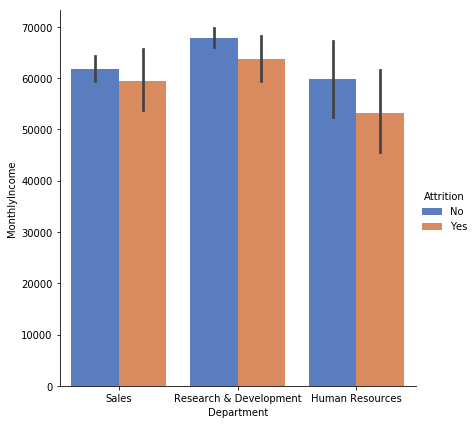

In [142]:
#plotting the salaries accross department 
g = sns.catplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df,
                height=6, kind="bar", palette="muted")

We cann see that across all departments, employees who have left have had lesser income as compared to the rest in their department and also Human resources has the least average income which can also be contributing to such a high rate of attrition in the department

In [171]:
#Creating a function to classify the employee according to the number of years they have been serving under the same manager

def Curr(row):
    if row['YearsWithCurrManager']<2:
        row['Curr']='Fresh Manager'
        return 'Fresh Manager'
    elif ((row['YearsWithCurrManager']>=2)&(row['YearsWithCurrManager']<=4)):
        row['Curr']='2-4 Years'
        return '2-4 Years'
    elif ((row['YearsWithCurrManager']>4)):
        row['Curr']='Old Manager'
        return 'Old Manager'
    
df['Curr']=df.apply(Curr,axis=1)

In [215]:
#Creating the Order via transforming it into a Categorical Datatype
order=['Fresh Manager','2-4 Years','Old Manager']
order=pd.api.types.CategoricalDtype(ordered=True,categories=order)
df['Curr']=df['Curr'].astype(order)

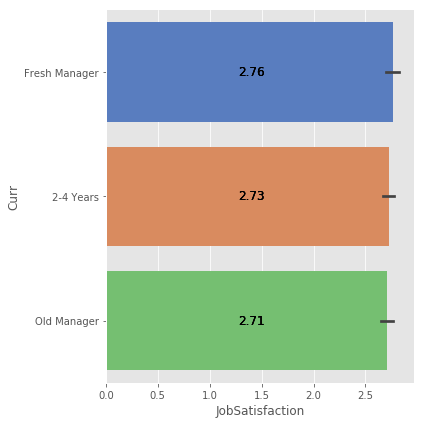

In [224]:
#Plotting the Job Satisfaction of employees under varying years served under the same manager
g = sns.catplot(x="JobSatisfaction", y="Curr" ,data=df,height=6, kind="bar", palette="muted")
ax = plt.gca()
#polishing
#Adding the values inside the bars
for p in ax.patches:
    ax.text(1.4 , p.get_height()-0.75, '2.76', 
            fontsize=12, color='Black', ha='center', va='bottom')
    ax.text(1.4 , p.get_height()+0.25, '2.73', 
            fontsize=12, color='Black', ha='center', va='bottom')
    ax.text(1.4 , p.get_height()+1.25, '2.71', 
            fontsize=12, color='Black', ha='center', va='bottom')


We can see that as the Employees have the same Manager for years and years on, their Job Satisfaction gradually decreases. This follows the same trend for those who left at a greater scale

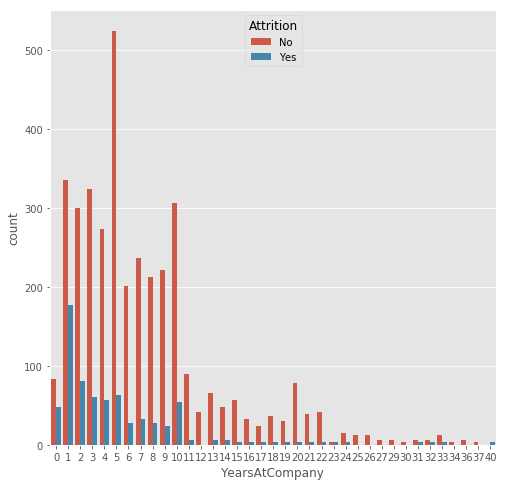

In [263]:
#plotting the attrition accross employees varying with the number of years they have served at the company
plt.figure(figsize=[8,8])
g = sns.countplot(x="YearsAtCompany",hue='Attrition',data=df)

Many of the employees of leave are those who work for 1 or less years since these might be the people who need work experience for higher studies or do not like the work place environment

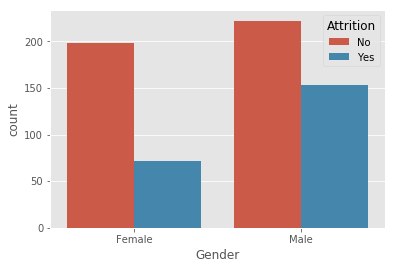

In [264]:
#Understanding the gender distribution of employees who left early
x=df[df['YearsAtCompany']<=1]
sns.countplot(data=x,x='Gender',hue='Attrition');